# Evalutatiemetrieken

## Wat?
* Machine Learning Algorithm
    * Supervised Machine Learning Algorithm
        * Regressie
        * Classificatie
    * Unsupervised Machine Learning Algorithm
        * Clustering
        * Associatie

- Regressie: poging om de sterkte en het karakter van de relatie tussen een afhankelijke variabele en een of een reeks onafhankelijke variabelen te bepalen.
- Classificatie: Het probleem van het identificeren tot welke van een reeks categorieën (subpopulaties) een waarneming (of waarnemingen) behoort.
- Clustering: Het groeperen van objecten, zodat objecten in hetzelfde cluster meer op elkaar lijken dan op objecten in een andere cluster.
- Associatie: Vindt belangrijke relaties tussen variabelen of functies in een gegevensset.

| In Data Science behandelde modelleringstechniek         | Evaluatietechniek                          |               |
|---------------------------------------------------------|--------------------------------------------|---------------|
| Lineaire Regressie                                      | R², MAE, RMSE, MAPE                        | Regressie     |
| Forecasting, ANN                                        | MAE, RMSE, MAPE                            | Regressie     |
| Clustering                                              | interclusterafstand, intraclusterafstand   | Clustering    |
| Association rules                                       | support, confidence, lift                  | Associatie    |
| Metaheuristieken                                        | objective function                         | Andere        |
| Naive Bayes, beslissingsbomen, discriminantanalyse, ANN | accuracy, precision, recall, TPR, FPR, ROC | Classificatie |

### Regressie

* $R² = (\frac{1}{2} \sum_{i=1}^{n}Z_{xi}Z_{yi})² = r_{xy}^{2}$
* Mean Absolute Error, $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - ŷ _i |$
* Root Mean Squared Error, $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - ŷ _i)^2}$
* Mean Absolute Percentage Error, $MAPE = \frac{1}{n}\sum_{i=1}^{n}|\frac{y_i - ŷ _i}{y_i}|$

## Classificatie metrieken

### Binair vs. Multiclass
* Binair: 2 klassen
    * M/V
    * Goed/Fout
    * ...
* Multiclass: meer dan 2 klassen
    * onvoldoende/Voldoende/Onderscheiding/...

Een decision tree wordt gebruikt voor het voorspellen van de klassen.

<img src="rsc/img/Schermafbeelding 2024-05-16 160750.png">

|                |  Accuracy (ACC)  |  Precision Recall  |  F-measure  |  TP Rate & FP Rate (Confusion Matrix)  |  ROC Curve  |
|----------------|:----------------:|:------------------:|:-----------:|:--------------------------------------:|:-----------:|
| **Binair**     |        x         |         x          |      x      |                   x                    |      x      |
| **Multiclass** |        x         |         x          |      x      |                                        |             |


### Confusion Matrix
Gebruikt door:
* Binair
* Multiclass

In [226]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functions.functions_Y2.evaluationMetrics import *
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

animals = pd.DataFrame([
    [60, 3, 1],
    [6, 40, 1],
    [2, 10, 20]
],
    columns=["kat", "hond", "konijn"],
    index=["kat", "hond", "konijn"])

animals

,kat,hond,konijn
kat,60,3,1
hond,6,40,1
konijn,2,10,20


De bovenste table is een voorbeeld van een confusion matrix. De rijen zijn de voorspellingen en de kolommen zijn de werkelijke waarden. De diagonaal van linksboven naar rechtsonder zijn de correcte voorspellingen. De overige cellen zijn de foutieve voorspellingen.

#### Terminologie
* True Positive (TP): de voorspelling is correct en is positief
* True Negative (TN): de voorspelling is correct en is negatief
* False Positive (FP): de voorspelling is fout en is positief
* False Negative (FN): de voorspelling is fout en is negatief
* Hoofddiagonaal: de lijn van linksboven naar rechtsonder
    * Hoe meer waarden op de hoofddiagonaal, hoe beter

### Accuracy (ACC)
- Een van de meest gebruikte maatstaven voor de classificatie.

$$ACC = \frac{TP + TN}{TP + TN + FP + FN}$$
OF
$$ACC = \frac{aantal\ correcte\ voorspellingen}{aantal\ voorspellingen}$$

In [227]:
tot = animals.join(pd.DataFrame(animals.sum(axis=1), columns=["Totaal"]))

cm = pd.concat([tot, pd.DataFrame(tot.sum(axis=0), columns=["Totaal"]).T])

cm

,kat,hond,konijn,Totaal
kat,60,3,1,64
hond,6,40,1,47
konijn,2,10,20,32
Totaal,68,53,22,143


$$accuracy= \frac{60 + 40 + 20}{143} = 0.84$$

In [228]:
accuracy(cm)

0.8391608391608392

### Precision
Hoeveel van de positieve voorspellingen zijn correct?

$$Precision = \frac{TP}{TP + FP}$$*per klasse*


In [229]:
precision(cm, "kat")
precision(cm, "hond")
precision(cm, "konijn")

0.8823529411764706

0.7547169811320755

0.9090909090909091

### Recall
Hoeveel van de werkelijke positieve voorspellingen zijn correct?

$$Recall = \frac{TP}{TP + FN}$$*per klasse*

In [230]:
recall(cm, "kat")
recall(cm, "hond")
recall(cm, "konijn")

0.9375

0.851063829787234

0.625

De rij Class precision zal weergeven wat de kans is dat als het model zegt dat het juist is dat het ook juist zal zijn.
De kolom Class recall zal weergeven wat de kans is dat het model een andere voorspelling geeft dan het juiste antwoord. 

### F-measure
De F-measure is een maatstaf die de precisie en recall combineert. Het is het gewogen harmonische gemiddelde van de precisie en recall.

$$F_{α}=\frac{2}{α\frac{1}{P} + (1 - α)\frac{1}{R}}$$

$$F_{β}=\frac{(1 + β^2)PR}{β^2P + R}\ waarbij\ β=\frac{1-α}{α}$$

* β = 1 (⇒ α = 0.5): Dit zorgt voor de $F_1$-measure die een gelijk gewicht toekent aan de precision en recall
* β > 1: meer belang hechten aan recall
* β < 1: meer belang hechten aan precision

In [231]:
f1_score(cm, "kat")
f1_score(cm, "hond")
f1_score(cm, "konijn")

0.9090909090909091

0.8

0.7407407407407406

In [248]:
acc, comb = evaluate(cm)
acc
comb

0.8391608391608392

,kat,hond,konijn,Totaal,Class Recall,F1-Score
kat,60.000000,3.000000,1.000000,64.0,0.937500,0.909091
hond,6.000000,40.000000,1.000000,47.0,0.851064,0.800000
konijn,2.000000,10.000000,20.000000,32.0,0.625000,0.740741
Totaal,68.000000,53.000000,22.000000,143.0,NaN,NaN
Class Precision,0.882353,0.754717,0.909091,NaN,NaN,NaN


## IRIS | Acc, Prec, Recall en F-Measure in Python

### Verwerk de gegevens

In [233]:
iris = pd.read_csv('../../data_aux/iris.csv', delimiter=",", decimal=".")
iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Maak het model

In [234]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = iris['target']
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

### Maak de confusion matrix

In [235]:
 # Nadat je een model hebt gemaakt, kan je de klassen voorspellen
# met de predict-functie 
real = iris.target
listOfLabels = sorted(real.unique().tolist())
# Maak een confusion array met werkelijke waarden in de rijen en 
# de voorspelde waarden in de kolommen.
predicted = model.predict(X)
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(real, predicted, labels=listOfLabels)
conf_matrix

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

### Visualiseer de Confusion Matrix

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

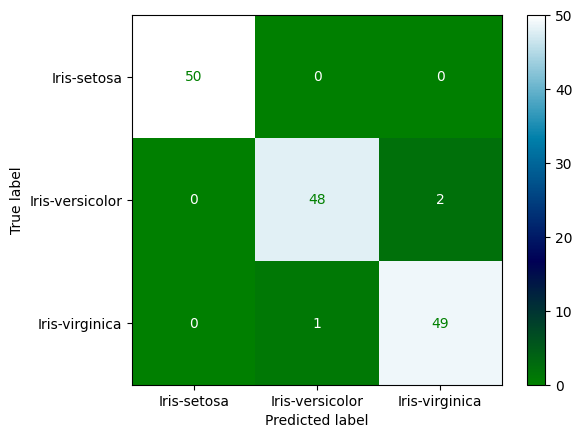

In [236]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure()
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=listOfLabels)
cmd.plot(cmap='ocean')
plt.show()

### Bereken de verschillende metrieken

In [237]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

print(real.unique())
accuracy_score(y_true=real, y_pred=predicted)
precision_recall_fscore_support(y_true=real, y_pred=predicted, labels=real.unique(), beta=1.0)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


0.98

(array([1.        , 0.97959184, 0.96078431]),
 array([1.  , 0.96, 0.98]),
 array([1.        , 0.96969697, 0.97029703]),
 array([50, 50, 50], dtype=int64))

## ROC in python

C:\Users\zouff\.venvs\DS2\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

0.8612303290414879

(array([0.85185185, 0.88709677]),
 array([0.95414847, 0.6846473 ]),
 array([0.90010299, 0.77283372]),
 array([458, 241], dtype=int64))

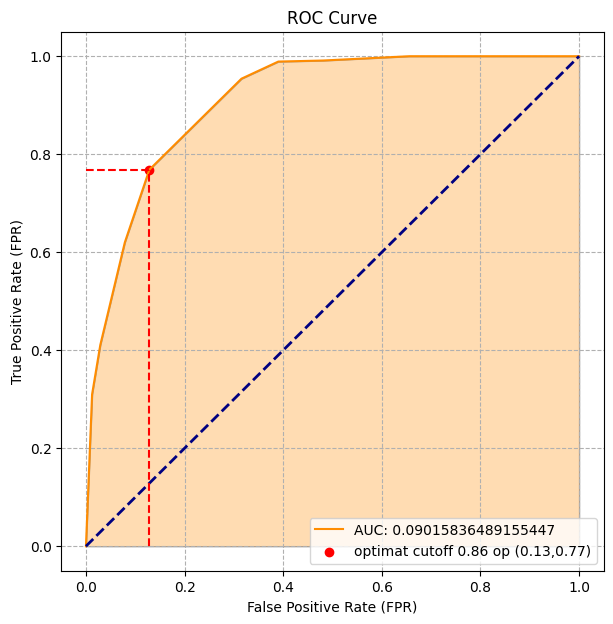

In [238]:
#1 input

biopsy = pd.read_csv('../../data_aux/biopsy.csv', delimiter=';')
X = biopsy[['V1']]
y = biopsy[['class']]
model = LinearDiscriminantAnalysis()
model.fit(X, y)
predicted = model.predict(X)

conf_matrix = confusion_matrix(y_true=y, y_pred=predicted, labels=np.unique(np.array(predicted)))
accuracy_score(y_true=y, y_pred=predicted)
precision_recall_fscore_support(y_true=y, y_pred=predicted, beta=1.0)
y_true = y
y_score = model.predict_proba(X)[:, 0]
plot_roc(y_true, y_score, pos_label='benign')

C:\Users\zouff\.venvs\DS2\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

0.9313304721030042

(array([0.91836735, 0.96172249]),
 array([0.98253275, 0.8340249 ]),
 array([0.94936709, 0.89333333]),
 array([458, 241], dtype=int64))

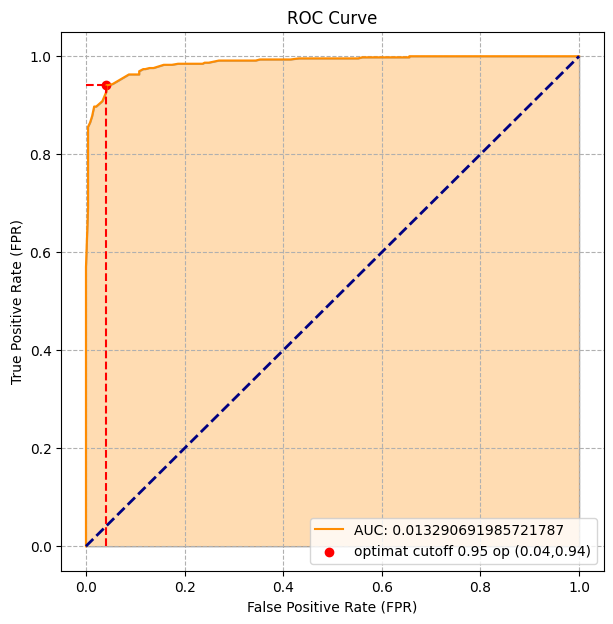

In [239]:
#2 inputs

biopsy = pd.read_csv('../../data_aux/biopsy.csv', delimiter=';')
X = biopsy[['V1', 'V2']]
y = biopsy[['class']]
model = LinearDiscriminantAnalysis()
model.fit(X, y)
predicted = model.predict(X)

conf_matrix = confusion_matrix(y_true=y, y_pred=predicted, labels=np.unique(np.array(predicted)))
accuracy_score(y_true=y, y_pred=predicted)
precision_recall_fscore_support(y_true=y, y_pred=predicted, beta=1.0)
y_true = y
y_score = model.predict_proba(X)[:, 0]
plot_roc(y_true, y_score, pos_label='benign')
